In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotting import make_error_fig
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from dataset import generate_data
from scipy.stats import norm

In [2]:
x_train, y_train = generate_data(n_samples=2000, unc=0.1, seed=42)
x_fit = x_train.reshape(-1, 1)  # sklearn expects 2D array for features

In [3]:
kernel = RBF(length_scale=0.1) + WhiteKernel(noise_level=1e-3)
gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True)
gp.fit(x_fit, y_train)

,kernel,RBF(length_sc...e_level=0.001)
,alpha,1e-10
,optimizer,'fmin_l_bfgs_b'
,n_restarts_optimizer,0
,normalize_y,True
,copy_X_train,True
,n_targets,None
,random_state,None
,kernel__k1,RBF(length_scale=0.1)
,kernel__k2,WhiteKernel(noise_level=0.001)
,kernel__k1__length_scale,0.1


In [4]:
x_test = np.linspace(-1.25, 1.25, 5000)
y_mean, y_std = gp.predict(x_test.reshape(-1, 1), return_std=True)

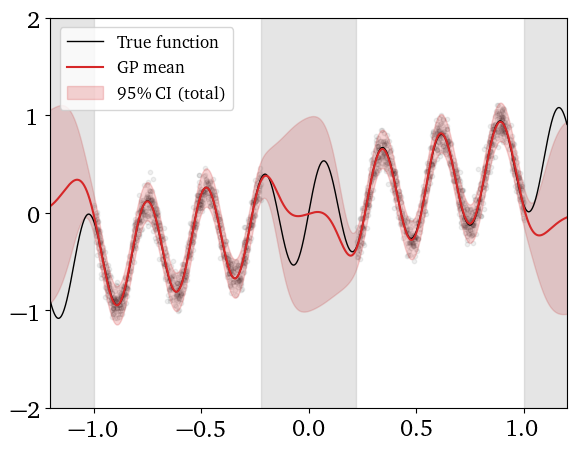

In [5]:
z = norm.ppf(0.975)  # two-sided: (1 + 0.95)/2
lower = y_mean - z * y_std
upper = y_mean + z * y_std

make_error_fig(
    data_train=(x_train, y_train),
    x_values=x_test.flatten(),
    y_mean=y_mean.flatten(),
    y_std_epistemic=0 * y_mean,
    y_std_aleatoric=0 * y_mean,
    ci_lower_upper=(lower, upper),
    network_name="GP",
    filename="gp_toy",
)